# Sentiment Analysis  

In [1]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=b450c42697bb75ae0d0b43ddfd001fe2c0998acf90cffb766c5ad784835675e3
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
     |████████████████████████████████| 61kB 2.1MB/s 
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


## Import Modules

In [0]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint

# Translation
from googletrans import Translator

# Utilities
from tqdm import tqdm
import numpy as np
import pandas as pd

# NLP
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [33]:
# Download resources
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
def honestdoc_comment(url):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.co).

    INPUT
    url : String
      URL of the target website
    
    OUTPUT
    comment : List
      List of comments
    score : List
      List of rating score
    """
    #create connection
    data = requests.get(url)
    print("requests code : {}".format(data.status_code)) 
    print("note\n2xx: success\n4xx, 5xx: error")
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query="web scraping",page=1)) 
    soup = BeautifulSoup(r.text,"html.parser")
    n = len(soup.find_all("div",{"class":"comments__content"})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all("div",
                             {"class":"comments__content"})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all("span",
                           {"class":"stars star-rating"})[i].attrs["data-score"] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print("Time used for scraping data from page - 1 : {} s".format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query="web scraping",page=p))
        soup = BeautifulSoup(r.text,"html.parser")
        n = len(soup.find_all("div",{"class":"comments__content"}))
        [comment.append(soup.find_all("div",
                                      {"class":"comments__content"})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all("span",
                                    {"class":"stars star-rating"})[i].attrs["data-score"]) for i in range(0,n)]
        elapsed_time = time() - start_time
        print("Time used for scraping data from page - {} : {} s".format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))
    
    #backup data 
    pd.DataFrame({"comment": comment, 
                  "score": score}).to_csv("comment_"+str(url[url.rfind("/")+1:]) + ".csv", index=False)
    
    return comment, score

In [0]:
comments, scores = honestdoc_comment(r"https://www.honestdocs.co/hospitals/vibharam-hospital")

requests code : 200
note
2xx: success
4xx, 5xx: error
Time used for scraping data from page - 1 : 1.3398418426513672 s
Time used for scraping data from page - 2 : 1.0975770950317383 s
Time used for scraping data from page - 3 : 1.18644118309021 s
Time used for scraping data from page - 4 : 1.0965299606323242 s


KeyboardInterrupt: ignored

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/')

In [0]:
# restore data
viram = pd.read_csv("comment_vibharam-hospital.csv")

In [8]:
viram.head(11)

,comment,score
0,หนูเกิดอุบัติเหตุรถชนค่ะ ไม่มีประกันรถยนต์ของค...,5
1,ใช้บริการของ รพ.วิภารามมาตั้งแต่ฝากครรภ์ คลอดแ...,5
2,บริการดีมากก คุณหมอก็ใจดีด้วย พยาบาลน่ารัก ทีา...,5
3,บริการดีมากค่ะใส่ใจดูเเลคนไข้ดี พยาบาล พูดจาดี...,5
4,ประทับใจมากๆค่ะ คุณหมอบริการดี พยาบาลน่ารัก ที...,4
5,ไปตรวจหูหมอใจดี ตรวจละเอียดมากมาก ฉันเดินทางเค...,5
6,หมอเก่งมาครับ ให้ยาดีๆ คอหอยส่วนจมูกอักเสบเฉีย...,4
7,โรงพยาบาลมีความสวยงาม ทางเดินตามตึกต่างๆมีสภาพ...,5
8,โรงพยาบาลสะอาด มีน้ำยาค่าเชื้อโรคอยู่ตามจุดต่า...,5
9,คือเราไม่ได้เป็นผู้ป่วยเองหรอกค่ะ\nแต่มีโอกาสไ...,5


## Comment Translation  



In [0]:
def th2en(comment):
  return Translator().translate(comment, src="th", dest="en").text

In [10]:
tqdm.pandas()

viram["en"] = viram.progress_apply(lambda x: th2en(x["comment"]), axis=1)


100%|██████████| 183/183 [04:40<00:00,  1.53s/it]


In [11]:
viram.head()

,comment,score,en
0,หนูเกิดอุบัติเหตุรถชนค่ะ ไม่มีประกันรถยนต์ของค...,5,Took my car crash None of the parties have a c...
1,ใช้บริการของ รพ.วิภารามมาตั้งแต่ฝากครรภ์ คลอดแ...,5,Using the services of a hospital Vibharam sinc...
2,บริการดีมากก คุณหมอก็ใจดีด้วย พยาบาลน่ารัก ทีา...,5,"The service is great, the doctor was kind of c..."
3,บริการดีมากค่ะใส่ใจดูเเลคนไข้ดี พยาบาล พูดจาดี...,5,Service is very attentive nurses look after pa...
4,ประทับใจมากๆค่ะ คุณหมอบริการดี พยาบาลน่ารัก ที...,4,Very impressive Doctor of Nursing offers a gre...


## Sentence-level Extraction  

Classifying sentiment polarity of a whole sentence is not recommended because a comment could be a mixture of sentiment polarities.  We will use the VADOR sentiment analyzer.  Details of the VADOR can be found here https://github.com/cjhutto/vaderSentiment.

In [0]:
def sent_level_polarity(df, target):
  sentences = []
  scores = []
  for i in df.index:
    en = df.loc[i, target]
    score = df.loc[i, "score"]
    s = sent_tokenize(en)
    sentences = sentences + s
    scores = scores + [score]*len(s)
  return pd.DataFrame({"sentences": sentences, "scores": scores})

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
data = sent_level_polarity(df=viram, target="en")
data["sentiment_polarity"] = data["sentences"].apply(lambda x: predict_sentiment(x))

In [15]:
data.head(11)

,sentences,scores,sentiment_polarity
0,Took my car crash None of the parties have a c...,5,negative
1,"Fortunately, the surgeon emergency a fast, do ...",5,positive
2,Min hospital had to calculate the cost to make...,5,neutral
3,And assistant nursing care was out of time.,5,positive
4,"Appointments made a neat, clean, clear",5,positive
5,Using the services of a hospital Vibharam sinc...,5,neutral
6,Maternity and child care or medical doctor's a...,5,positive
7,The Vibharam it.,5,neutral
8,Many doctors are able to take care of a good d...,5,positive
9,PACU delivery room very good especially for a ...,5,positive


## Exclude Neutral  


In [0]:
data = data[data["sentiment_polarity"] != "neutral"].reset_index(drop=True)

In [17]:
data.head(11)

,sentences,scores,sentiment_polarity
0,Took my car crash None of the parties have a c...,5,negative
1,"Fortunately, the surgeon emergency a fast, do ...",5,positive
2,And assistant nursing care was out of time.,5,positive
3,"Appointments made a neat, clean, clear",5,positive
4,Maternity and child care or medical doctor's a...,5,positive
5,Many doctors are able to take care of a good d...,5,positive
6,PACU delivery room very good especially for a ...,5,positive
7,"The service is great, the doctor was kind of c...",5,positive
8,"Medical equipment, modern, clean bathrooms Hos...",5,positive
9,This hospital impresses me good good I can tra...,5,positive


## Marking Negation  
Negation twists sentiment polarity.  Let's mark them and twist sentiment polarity.

In [0]:
data["neg_mark"] = data["sentences"].apply(lambda x: " ".join(mark_negation(x.split())))

In [0]:
data["flag"] = data["neg_mark"].apply(lambda x: True if "_NEG" in x else False)

In [0]:
def neg_extract(text):
  tokens = word_tokenize(text)
  return " ".join([token[0:-4] if token[-4:] == "_NEG" else token for token in tokens])

In [0]:
data["neg_words"] = data["neg_mark"].apply(lambda x: neg_extract(x))

In [0]:
data["post_polarity"] = data["neg_words"].apply(lambda x: predict_sentiment(x))

In [25]:
data2 = data[data["sentiment_polarity"] != data["post_polarity"]].reset_index(drop=True)

data2.head()


,sentences,scores,sentiment_polarity,neg_mark,flag,neg_words,post_polarity
0,(I use this term as well) delayed some doctors...,1,negative,(I use this term as well) delayed some doctors...,False,( I use this term as well ) delayed some docto...,positive


In [26]:
data.head(100)

,sentences,scores,sentiment_polarity,neg_mark,flag,neg_words,post_polarity
0,Took my car crash None of the parties have a c...,5,negative,Took my car crash None of the parties have a c...,False,Took my car crash None of the parties have a c...,negative
1,"Fortunately, the surgeon emergency a fast, do ...",5,positive,"Fortunately, the surgeon emergency a fast, do ...",True,"Fortunately , the surgeon emergency a fast , d...",positive
2,And assistant nursing care was out of time.,5,positive,And assistant nursing care was out of time.,False,And assistant nursing care was out of time .,positive
3,"Appointments made a neat, clean, clear",5,positive,"Appointments made a neat, clean, clear",False,"Appointments made a neat , clean , clear",positive
4,Maternity and child care or medical doctor's a...,5,positive,Maternity and child care or medical doctor's a...,False,Maternity and child care or medical doctor 's ...,positive
...,...,...,...,...,...,...,...
95,The hospital gave me good advice.,5,positive,The hospital gave me good advice.,False,The hospital gave me good advice .,positive
96,The hospital gave me good advice.,5,positive,The hospital gave me good advice.,False,The hospital gave me good advice .,positive
97,The hospital gave me good advice.,5,positive,The hospital gave me good advice.,False,The hospital gave me good advice .,positive
98,The hospital gave me good advice.,5,positive,The hospital gave me good advice.,False,The hospital gave me good advice .,positive


## **Parsing**

In [0]:
grammar = """NP: {<NN|NNS>+}
                {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)

def parsing_extract(sentence):
  parsed_tree = chunker.parse(pos_tag(word_tokenize(sentence)))

  nps = []
  for subtree in parsed_tree.subtrees():
      if subtree.label() == 'NP':
          t = subtree
          t = " ".join(word for word, tag in t.leaves())
          nps.append(t)
  return nps

In [0]:
data["NP"] = data["sentences"].apply(lambda x: parsing_extract(x))

In [35]:
data.shape

(488, 8)

In [36]:
data.head()

,sentences,scores,sentiment_polarity,neg_mark,flag,neg_words,post_polarity,NP
0,Took my car crash None of the parties have a c...,5,negative,Took my car crash None of the parties have a c...,False,Took my car crash None of the parties have a c...,negative,"[car crash None, parties, car insurance]"
1,"Fortunately, the surgeon emergency a fast, do ...",5,positive,"Fortunately, the surgeon emergency a fast, do ...",True,"Fortunately , the surgeon emergency a fast , d...",positive,"[surgeon emergency, fast, name, year, bird, ho..."
2,And assistant nursing care was out of time.,5,positive,And assistant nursing care was out of time.,False,And assistant nursing care was out of time .,positive,"[assistant nursing care, time]"
3,"Appointments made a neat, clean, clear",5,positive,"Appointments made a neat, clean, clear",False,"Appointments made a neat , clean , clear",positive,"[Appointments, neat]"
4,Maternity and child care or medical doctor's a...,5,positive,Maternity and child care or medical doctor's a...,False,Maternity and child care or medical doctor 's ...,positive,"[care, doctor, appointment process]"


# **Split dataframe into positive and negative sentiment**

In [0]:
pos = data[data["sentiment_polarity"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [38]:
poshist.sort_values(by='#pos', ascending=False)

,words,#pos
137,hospital,61
79,doctor,37
6,advice,34
259,service,25
44,care,24
...,...,...
130,heart doctor,1
131,heart hospital,1
132,heck,1
133,heel,1


In [0]:
neg = data[data["sentiment_polarity"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

In [40]:
neghist.sort_values(by='#neg', ascending=False)

,words,#neg
81,doctor,33
135,hospital,19
245,service,19
83,doctors,14
208,patients,13
...,...,...
121,games,1
122,gang,1
123,glowing smile,1
124,good,1


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

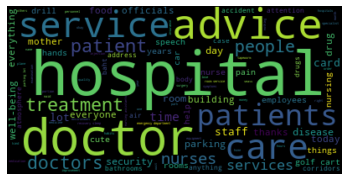

In [43]:
vizwordcloud(poshist)

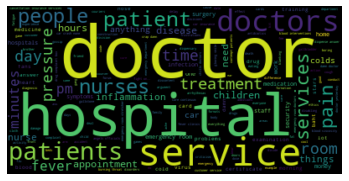

In [44]:
vizwordcloud(neghist)